#### OM NAMO NARAYANA

**Reference implementation** : https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/ 

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import pandas as pd
import random
import numpy as np
import math
from tqdm import tqdm

## Dataset preparation

We use NLTK for word tokenizers

In [4]:
dataset_dir = 'H:/sem8/nlp/proof-of-concept/Motivational Quotes Database.csv'


df = pd.read_csv(dataset_dir)
df.head()

,Quotes,Author,Category
0,Age is an issue of mind over matter. If you do...,Mark Twain,age\n
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age\n
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age\n
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age\n
4,A diplomat is a man who always remembers a wom...,Robert Frost,age\n


In [5]:
sentences = df['Quotes'].to_list()
sentences[:2]

["Age is an issue of mind over matter. If you don't mind, it doesn't matter.",
 'Anyone who stops learning is old, whether at twenty or eighty. Anyone who keeps learning stays young. The greatest thing in life is to keep your mind young.']

In [6]:
tokenized_sent = []
for s in tqdm(sentences):
    tokenized_sent.append(word_tokenize(s.lower()))
print(*tokenized_sent[1:3])

100%|██████████████████████████████████████████████████████████████████████████| 45575/45575 [00:17<00:00, 2664.07it/s]

['anyone', 'who', 'stops', 'learning', 'is', 'old', ',', 'whether', 'at', 'twenty', 'or', 'eighty', '.', 'anyone', 'who', 'keeps', 'learning', 'stays', 'young', '.', 'the', 'greatest', 'thing', 'in', 'life', 'is', 'to', 'keep', 'your', 'mind', 'young', '.'] ['wrinkles', 'should', 'merely', 'indicate', 'where', 'smiles', 'have', 'been', '.']


In [7]:
from scipy.spatial import distance

## Doc2Vec

**documentation** : https://radimrehurek.com/gensim/models/doc2vec.html

**demonstration** : https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py <br/>

- We train the model from scratch here
- Unsupervised algorithm
- Continuous Bag of words type and skip gram type

For each token (sentence) from tokenizer, we assign an index to the sentence

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data[:2]

D:\OS\programs\anaconda3\envs\fyp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[TaggedDocument(words=['age', 'is', 'an', 'issue', 'of', 'mind', 'over', 'matter', '.', 'if', 'you', 'do', "n't", 'mind', ',', 'it', 'does', "n't", 'matter', '.'], tags=[0]),
 TaggedDocument(words=['anyone', 'who', 'stops', 'learning', 'is', 'old', ',', 'whether', 'at', 'twenty', 'or', 'eighty', '.', 'anyone', 'who', 'keeps', 'learning', 'stays', 'young', '.', 'the', 'greatest', 'thing', 'in', 'life', 'is', 'to', 'keep', 'your', 'mind', 'young', '.'], tags=[1])]

In [9]:
# workers=2 works fastest
model = Doc2Vec(vector_size = 20, window = 2, min_count = 2, epochs = 10, workers=2)

model.build_vocab(tagged_data)

%time model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
words = list(model.wv.index_to_key)
print(words[:2])


Wall time: 52.8 s
['.', ',']


In [10]:
test_doc = word_tokenize("I want freedom".lower())
test_doc_vector = model.infer_vector(test_doc)
print(test_doc_vector)
x = model.dv.most_similar(positive = [test_doc_vector], topn=10)
print(x)

[ 0.07447035  0.04892112  0.06480086  0.0256297  -0.10857244 -0.06330144
  0.07706815  0.05902652  0.07944272 -0.07470851 -0.08211119 -0.0961201
  0.05281993 -0.07723278  0.08934417 -0.17848739  0.00675406  0.02949584
  0.06259582 -0.10678063]
[(7422, 0.8489336967468262), (18709, 0.8474291563034058), (17237, 0.8415979743003845), (42321, 0.8353790044784546), (22916, 0.8220664262771606), (12940, 0.8204892873764038), (39554, 0.8142619729042053), (12690, 0.8134011626243591), (6269, 0.8125656247138977), (15706, 0.8085902333259583)]


In [11]:
index = [sentences[j] for j in [i[0] for i in x]]
for y in index:
    print(y)

The truth does not change according to our ability to stomach it.
The world has nothing to fear from military ambition in our Government.
I think when someone is injured in your family, you want to speak to the individual and you want to hear their voice and you want to make sure they are OK.
I'm still going to do television. I'm just not going to do morning television. I would like to do some things that satisfy interests, private interests.
The garden suggests there might be a place where we can meet nature halfway.
We need affordable space travel to inspire our youth, to let them know that they can experience their dreams, can set significant goals and be in a position to lead all of us to future progress in exploration, discovery and fun. Thanks to the X Prize for the inspiration.
At the bottom of not a little of the bravery that appears in the world, there lurks a miserable cowardice. Men will face powder and steel because they have not the courage to face public opinion.
It has n

## SentenceBERT

**Reference**: https://www.sbert.net/

- We import and use the pre-trained mode
- Here we don't train the model

In [12]:
from sentence_transformers import SentenceTransformer
%time sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Wall time: 22.3 s


In [13]:
%time sentence_embeddings = sbert_model.encode(sentences[:2000])

Wall time: 2min 58s


In [14]:
query = "God is Great"
query_vec = sbert_model.encode([query])[0]

In [15]:
topn = 5
n = 2000

sim = []
for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, sbert_model.encode([sent])[0]))
#   print("Sentence = ", sent, "; similarity = ", sim)
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:43<00:00,  7.05it/s]


["Old age isn't so bad when you consider the alternative."
 'I vividly remember being 14. That was the age when I started to get happy: I started being a writer and stopped being a loser.'
 "Be able to live alone, even if you don't want to and think you will never find it necessary."
 'No woman should ever be quite accurate about her age. It looks so calculating.'
 'The greatest writers of this age... are aware of the mystery of our existence.']


## InferSent

In [16]:
import os

encoder_dir = 'H:/sem8/nlp/proof-of-concept/'

os.chdir(encoder_dir)

if(os.path.isdir(encoder_dir + 'encoder')  == False):
    ! mkdir encoder
    ! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
else:
    print('A subdirectory already exists.')
    

if(os.path.isdir(encoder_dir + 'Glove')  == False):
    ! mkdir GloVe
    ! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
    ! unzip GloVe/glove.840B.300d.zip -d GloVe/
else:
    print('A subdirectory already exists.')


A subdirectory already exists.
A subdirectory already exists.


In [17]:
from models import InferSent
import torch

V = 2
base_path = 'H:/sem8/nlp/proof-of-concept/'
MODEL_PATH = base_path + 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = base_path + '/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [18]:
%time model.build_vocab(sentences, tokenize=True)

Found 42186(/44882) words with w2v vectors
Vocab size : 42186
Wall time: 1min 50s


In [19]:
query = "Life is very short nanba, always be happy. Design Design a problems will come and go don't worry"
query_vec = model.encode(query)[0]
query_vec

H:\jupyter-files\models.py:207: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sentences = np.array(sentences)[idx_sort]


array([-0.01715463,  0.04943122, -0.17540526, ..., -0.01258784,
       -0.067958  , -0.04156346], dtype=float32)

In [20]:
topn = 10
n = 100

similarity = []
sim = []

for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, model.encode([sent])[0]))
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.64it/s]


['Wrinkles should merely indicate where smiles have been.'
 'The denunciation of the young is a necessary part of the hygiene of older people, and greatly assists the circulation of the blood.'
 'Old age is the most unexpected of all the things that can happen to a man.'
 'Age is not a particularly interesting subject. Anyone can get old. All you have to do is live long enough.'
 'Age appears to be best in four things old wood best to burn, old wine to drink, old friends to trust, and old authors to read.'
 'Old age is a shipwreck.'
 'There is a fountain of youth: it is your mind, your talents, the creativity you bring to your life and the lives of people you love. When you learn to tap this source, you will truly have defeated age.'
 'I want to get old gracefully. I want to have good posture, I want to be healthy and be an example to my children.'
 'The aging process has you firmly in its grasp if you never get the urge to throw a snowball.'
 "Age is an issue of mind over matter. If y

In [21]:
import matplotlib.pyplot as plt

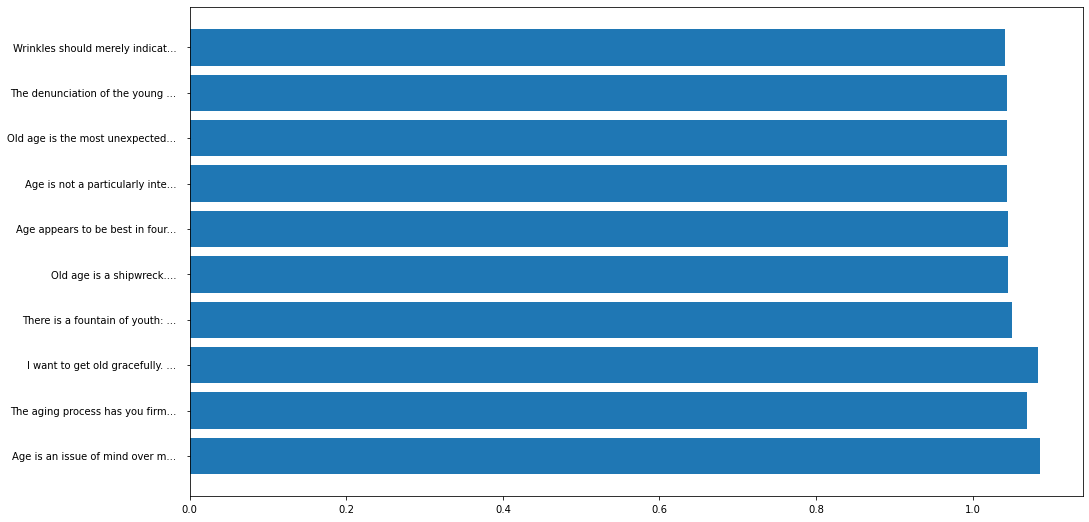

In [22]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.barh([x[:30] + '...' for x in np.array(sentences)[ind]], np.array(sim)[ind])
ax.invert_yaxis()
plt.show()

## Universal Sentence Encoder

In [23]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

ModuleNotFoundError: No module named 'tensorflow_hub'